In [1]:
%matplotlib inline
from effective_quadratures.parameter import Parameter
from effective_quadratures.indexset import IndexSet
from effective_quadratures.effectivequads import EffectiveSubsampling
import numpy as np

In [2]:
def fun(x):
            return 1.0/(1 + 50*(x[0]- 0.9)**2 + 50*(x[1] + 0.9)**2 )

In [3]:
no_of_subsamples = 10
x1 = Parameter(param_type="Uniform", lower=-1, upper=1, points=no_of_subsamples)
x2 = Parameter(param_type="Uniform", lower=-1, upper=1, points=no_of_subsamples)
parameters = [x1, x2]
Hyperbolic = IndexSet("Hyperbolic basis", orders=[no_of_subsamples-1,no_of_subsamples-1], q=0.3)
esq = EffectiveSubsampling(parameters, Hyperbolic)
minimum_subsamples = esq.least_no_of_subsamples_reqd() 
esq.set_no_of_evals(minimum_subsamples)

In [4]:
x, cond = esq.computeCoefficients(fun)

0.0107872858461
3.10448153315e-05
[ 0.57380852  0.42619148]


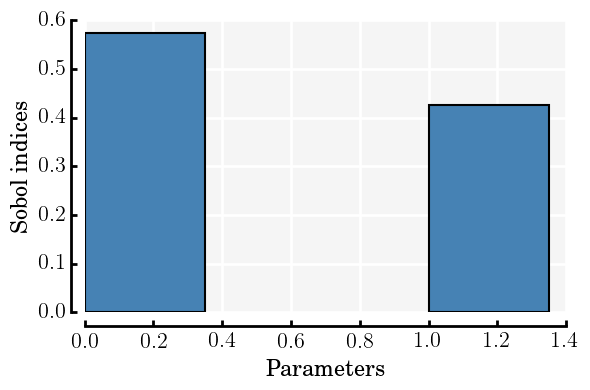

In [5]:
statistics = esq.stats(fun)
print statistics.mean
print statistics.variance
print statistics.fosi
statistics.plot()